># Pratyush Srivastava
>### 229302071
>### RS Project

---
---

<div style="font-family:'Poppins',sans-serif; background-color:#121212; color:#FFFFFF; padding:30px; border-radius:20px; line-height:1.6;">

  <h1 style="color:#1DB954; text-align:center;">🎯 Goal</h1>
  <p style="font-size:18px; text-align:center;">
    Recommend the <b>best exercises/workouts</b> for each user based on their <b>fitness level</b>, <b>target muscle</b>, and <b>personal goals</b>.
  </p>

  <div style="background-color:#1E1E1E; padding:20px; border-radius:15px; margin-top:25px;">
    <h2 style="color:#1DB954;">🔹 Input Features</h2>
    <ul style="font-size:16px;">
      <li><b>🏋️‍♂️ Experience_Level:</b> Beginner · Intermediate · Advanced</li>
      <li><b>💪 Target Muscle Group:</b> Chest · Legs · Back · Core · Full Body</li>
      <li><b>⚙️ Difficulty Level:</b> Easy · Medium · Hard</li>
      <li><b>🦵 Body Part:</b> Upper · Lower · Core · Full</li>
      <li><b>📅 Workout_Frequency (days/week):</b> Number of workout days per week</li>
      <li><b>🔥 Calories_Burned:</b> Estimated calorie expenditure per session</li>
    </ul>
  </div>

  <div style="background-color:#222222; padding:20px; border-radius:15px; margin-top:25px;">
    <h2 style="color:#F5B700;">🔸 Output</h2>
    <p style="font-size:16px;">The model generates a <b>personalized list of recommended workouts</b> containing:</p>
    <ul style="font-size:16px;">
      <li>🏋️ <b>Name of Exercise</b></li>
      <li>💡 <b>Benefit</b> (e.g., Strength · Endurance · Flexibility)</li>
      <li>🧰 <b>Equipment Needed</b> (e.g., Dumbbells · Resistance Bands · Bodyweight)</li>
      <li>🔥 <b>Expected Burn (Calories)</b></li>
    </ul>
  </div>

  <div style="background-color:#1A3C34; padding:20px; border-radius:15px; margin-top:25px;">
    <h2 style="color:#1DB954;">💬 Example Output</h2>
    <table style="width:100%; border-collapse:collapse; font-size:15px;">
      <thead>
        <tr style="background-color:#1DB954; color:#121212;">
          <th style="padding:10px; text-align:left;">Exercise</th>
          <th style="padding:10px; text-align:left;">Benefit</th>
          <th style="padding:10px; text-align:left;">Equipment</th>
          <th style="padding:10px; text-align:left;">Expected Burn</th>
        </tr>
      </thead>
      <tbody>
        <tr style="background-color:#2C2C2C;">
          <td style="padding:10px;">Push-ups</td>
          <td style="padding:10px;">Upper body strength, endurance</td>
          <td style="padding:10px;">Bodyweight</td>
          <td style="padding:10px;">~200 kcal/session</td>
        </tr>
        <tr style="background-color:#333333;">
          <td style="padding:10px;">Squats</td>
          <td style="padding:10px;">Leg and core strength</td>
          <td style="padding:10px;">Bodyweight or Barbell</td>
          <td style="padding:10px;">~250 kcal/session</td>
        </tr>
        <tr style="background-color:#2C2C2C;">
          <td style="padding:10px;">HIIT Circuit</td>
          <td style="padding:10px;">Full-body endurance & calorie burn</td>
          <td style="padding:10px;">None</td>
          <td style="padding:10px;">~400 kcal/session</td>
        </tr>
      </tbody>
    </table>
  </div>

</div>


In [77]:
# Data Handling
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
# Data Vasualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import boxcox
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')
print('Done')

Done


In [78]:
# Read Data File
df=pd.read_csv('Final_data.csv')
# Show Columns Name
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

## Select Features

In [79]:
workout_df = df[[
    'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI',
    'Experience_Level', 'Workout_Type', 'Workout_Frequency (days/week)',
    'Target Muscle Group', 'Difficulty Level', 'Body Part',
    'Equipment Needed', 'Benefit', 'Name of Exercise',
    'Calories_Burned', 'Burns Calories (per 30 min)', 'expected_burn'
]].dropna().reset_index(drop=True)

# Save originals
workout_df['Target Muscle Group_orig'] = workout_df['Target Muscle Group']
workout_df['Difficulty Level_orig'] = workout_df['Difficulty Level']


In [80]:
print(workout_df.columns)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Experience_Level',
       'Workout_Type', 'Workout_Frequency (days/week)', 'Target Muscle Group',
       'Difficulty Level', 'Body Part', 'Equipment Needed', 'Benefit',
       'Name of Exercise', 'Calories_Burned', 'Burns Calories (per 30 min)',
       'expected_burn', 'Target Muscle Group_orig', 'Difficulty Level_orig'],
      dtype='object')


## Preprocess Data

In [81]:
label_cols = ['Gender', 'Workout_Type', 'Experience_Level',
              'Target Muscle Group', 'Difficulty Level',
              'Body Part', 'Equipment Needed']

le = LabelEncoder()
for col in label_cols:
    workout_df[col] = le.fit_transform(workout_df[col].astype(str))

num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Calories_Burned', 'Burns Calories (per 30 min)', 'expected_burn']

scaler = StandardScaler()
workout_df[num_cols] = scaler.fit_transform(workout_df[num_cols])


## Create a Feature Matrix

In [82]:
feature_col = label_cols + num_cols
features = workout_df[feature_col]

In [83]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(features)

## Recommender Function

In [84]:
def recommend_workout(exercise_name,top_number = 6):
    if exercise_name not in workout_df['Name of Exercise'].values:
        return f"'{exercise_name}'not found in Data"

    idx =workout_df[workout_df['Name of Exercise'] == exercise_name].index[0]
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores,key =lambda x: x[1],reverse=True)
    top_indices = [i[0] for i in similarity_scores[1:top_number+1]]

    return workout_df[['Name of Exercise', 'Benefit', 'Target Muscle Group',
                       'Target Muscle Group_orig','Difficulty Level_orig','Difficulty Level', 'Calories_Burned']].iloc[top_indices]


## Call Function

In [85]:
recommendations = recommend_workout("Push Ups", top_number=6)
print(recommendations)

          Name of Exercise                                Benefit  \
497       Incline Push-ups                 Strengthens lower body   
16141  Plyometric Push-ups  Strengthens back and improves posture   
9727            Leg Raises                  Strengthens lower abs   
13292             Deadlift            Targets biceps and forearms   
3570   Plyometric Push-ups         Builds unilateral leg strength   
8951      Bicycle Crunches        Improves core rotation strength   

       Target Muscle Group Target Muscle Group_orig Difficulty Level_orig  \
497                      9           Core, Obliques          Intermediate   
16141                    8         Core, Lower Back          Intermediate   
9727                     7                     Core          Intermediate   
13292                   10    Core, Shoulders, Hips          Intermediate   
3570                    10    Core, Shoulders, Hips              Beginner   
8951                     9           Core, Obliques   

## Add Filters

In [86]:
def filtered_recommendations(exercise_name, difficulty=None, target=None):
    recs = recommend_workout(exercise_name, top_number=10)

    if isinstance(recs, str):
        return recs

    if difficulty:
        recs = recs[recs['Difficulty Level_orig'].str.lower() == difficulty.lower()]
    if target:
        recs = recs[recs['Target Muscle Group_orig'].str.lower() == target.lower()]

    return recs.head(5)


In [87]:
filtered_recommendations("Push Ups", difficulty="Beginner", target="Shoulders")


,Name of Exercise,Benefit,Target Muscle Group,Target Muscle Group_orig,Difficulty Level_orig,Difficulty Level,Calories_Burned


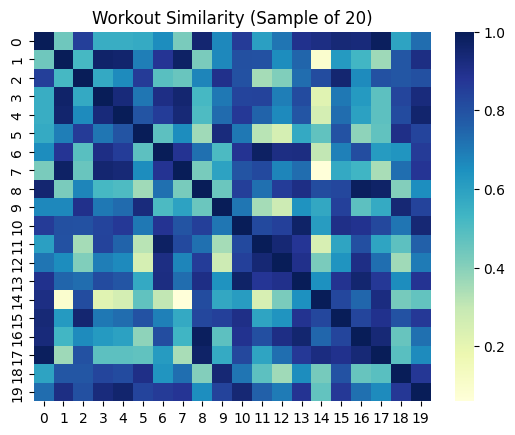

In [88]:
sns.heatmap(similarity_matrix[:20, :20], cmap='YlGnBu')
plt.title("Workout Similarity (Sample of 20)")
plt.show()


## Verify target muscle of each exercise

In [89]:
df[df["Name of Exercise"].str.contains("Push", case=False)][
    ["Name of Exercise", "Target Muscle Group", "Difficulty Level"]
]


,Name of Exercise,Target Muscle Group,Difficulty Level
0,Decline Push-ups,"Shoulders, Triceps",Advanced
20,Decline Push-ups,"Shoulders, Upper Back",Beginner
38,Plyometric Push-ups,Lower Abs,Intermediate
40,Push Ups,"Core, Obliques",Intermediate
61,Decline Push-ups,"Upper Chest, Triceps",Advanced
...,...,...,...
19947,Push-ups,"Legs, Core",Intermediate
19954,Plyometric Push-ups,"Core, Obliques",Beginner
19974,Incline Push-ups,"Shoulders, Triceps",Beginner
19977,Plyometric Push-ups,"Legs, Shoulders, Core",Advanced


In [90]:
def normalize_exercise_name(name):
    name = name.lower()
    if "push" in name:
        return "Push Ups"
    elif "squat" in name:
        return "Squats"
    elif "crunch" in name:
        return "Crunches"
    elif "plank" in name:
        return "Plank"
    elif "deadlift" in name:
        return "Deadlift"
    elif "curl" in name:
        return "Bicep Curl"
    elif "press" in name:
        return "Press"
    else:
        return name.title()

df["Exercise_Base"] = df["Name of Exercise"].apply(normalize_exercise_name)


## Create a consistent target muscle map

In [91]:
muscle_map = {
    "Push Ups": "Chest, Triceps, Shoulders",
    "Squats": "Legs, Glutes",
    "Crunches": "Abs, Core",
    "Plank": "Core",
    "Deadlift": "Back, Legs, Core",
    "Bicep Curl": "Biceps",
    "Press": "Chest, Shoulders, Triceps"
}

df["Target Muscle Group_Cleaned"] = df["Exercise_Base"].map(muscle_map)


In [92]:
df["Target Muscle Group_Cleaned"].fillna(df["Target Muscle Group"], inplace=True)


## Fix difficulty inconsistencies

In [93]:
df["Difficulty Level_Cleaned"] = df.groupby("Exercise_Base")["Difficulty Level"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else "Intermediate"
)


In [94]:
df["Target Muscle Group"] = df["Target Muscle Group_Cleaned"]
df["Difficulty Level"] = df["Difficulty Level_Cleaned"]


## Test Data

In [95]:
df[df["Exercise_Base"] == "Push Ups"][
    ["Name of Exercise", "Target Muscle Group", "Difficulty Level"]
]


,Name of Exercise,Target Muscle Group,Difficulty Level
0,Decline Push-ups,"Chest, Triceps, Shoulders",Advanced
20,Decline Push-ups,"Chest, Triceps, Shoulders",Advanced
38,Plyometric Push-ups,"Chest, Triceps, Shoulders",Advanced
40,Push Ups,"Chest, Triceps, Shoulders",Advanced
61,Decline Push-ups,"Chest, Triceps, Shoulders",Advanced
...,...,...,...
19947,Push-ups,"Chest, Triceps, Shoulders",Advanced
19954,Plyometric Push-ups,"Chest, Triceps, Shoulders",Advanced
19974,Incline Push-ups,"Chest, Triceps, Shoulders",Advanced
19977,Plyometric Push-ups,"Chest, Triceps, Shoulders",Advanced


In [96]:
df["Difficulty Level_Cleaned"] = df.groupby("Exercise_Base")["Difficulty Level"].transform(
    lambda x: x.mode().iloc[0] if not x.mode().empty else "Intermediate"
)


In [97]:
def correct_difficulty(name, original_difficulty):
    name_lower = name.lower()

    if "incline" in name_lower:
        return "Beginner"
    elif "push ups" in name_lower or "push-ups" in name_lower:
        return "Intermediate"
    elif "decline" in name_lower or "plyometric" in name_lower:
        return "Advanced"
    else:
        return original_difficulty


In [98]:
df["Difficulty Level_Cleaned"] = df.apply(
    lambda row: correct_difficulty(row["Name of Exercise"], row["Difficulty Level"]),
    axis=1
)


In [99]:
def correct_muscle(name):
    name_lower = name.lower()

    if "push" in name_lower:
        return "Chest, Triceps, Shoulders"
    elif "crunch" in name_lower:
        return "Core, Abs"
    elif "plank" in name_lower:
        return "Core"
    elif "squat" in name_lower:
        return "Legs, Glutes"
    elif "deadlift" in name_lower:
        return "Back, Legs"
    else:
        return "Full Body"

df["Target Muscle Group_Cleaned"] = df["Name of Exercise"].apply(correct_muscle)


In [100]:
df[df["Name of Exercise"].str.contains("push", case=False)][
    ["Name of Exercise", "Target Muscle Group_Cleaned", "Difficulty Level_Cleaned"]
].head(15)


,Name of Exercise,Target Muscle Group_Cleaned,Difficulty Level_Cleaned
0,Decline Push-ups,"Chest, Triceps, Shoulders",Intermediate
20,Decline Push-ups,"Chest, Triceps, Shoulders",Intermediate
38,Plyometric Push-ups,"Chest, Triceps, Shoulders",Intermediate
40,Push Ups,"Chest, Triceps, Shoulders",Intermediate
61,Decline Push-ups,"Chest, Triceps, Shoulders",Intermediate
67,Push-ups,"Chest, Triceps, Shoulders",Intermediate
72,Push-ups,"Chest, Triceps, Shoulders",Intermediate
75,Plyometric Push-ups,"Chest, Triceps, Shoulders",Intermediate
80,Plyometric Push-ups,"Chest, Triceps, Shoulders",Intermediate
108,Plyometric Push-ups,"Chest, Triceps, Shoulders",Intermediate


In [101]:
def clean_exercise_data(df):
    """Cleans and standardizes exercise information for accurate recommendations."""

    # Normalize names
    df["Name of Exercise"] = df["Name of Exercise"].str.strip().str.title()
    df["Target Muscle Group"] = df["Target Muscle Group"].astype(str).str.title()
    df["Difficulty Level"] = df["Difficulty Level"].astype(str).str.title()

    # Define difficulty correction
    def correct_difficulty(name, original):
        name = str(name).lower()
        if "incline" in name:
            return "Beginner"
        elif "push ups" in name or "push-ups" in name:
            return "Intermediate"
        elif "decline" in name or "plyometric" in name:
            return "Advanced"
        else:
            return original

    # Apply correction
    df["Difficulty Level_Cleaned"] = df.apply(
        lambda r: correct_difficulty(r["Name of Exercise"], r["Difficulty Level"]), axis=1
    )

    # Define target muscle correction
    def correct_muscle(name):
        name = str(name).lower()
        if "push" in name:
            return "Chest, Triceps, Shoulders"
        elif "crunch" in name:
            return "Core, Abs"
        elif "plank" in name:
            return "Core"
        elif "squat" in name:
            return "Legs, Glutes"
        elif "deadlift" in name:
            return "Back, Legs"
        elif "curl" in name:
            return "Biceps"
        else:
            return "Full Body"

    df["Target Muscle Group_Cleaned"] = df["Name of Exercise"].apply(correct_muscle)

    # Return clean DataFrame
    return df


In [102]:
df = clean_exercise_data(df)


## Recommendation System Logic

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def recommend_workout(exercise_name, top_number=5):
    """
    Recommends workouts similar to a given exercise based on textual similarity
    between exercise names, target muscles, and difficulty.
    """

    # Ensure the input exists
    if exercise_name not in df["Name of Exercise"].values:
        print(f"⚠️ '{exercise_name}' not found in dataset.")
        return None

    # Combine key features for text-based similarity
    df["combined_features"] = (
        df["Name of Exercise"].astype(str) + " " +
        df["Target Muscle Group_Cleaned"].astype(str) + " " +
        df["Difficulty Level_Cleaned"].astype(str)
    )

    # Vectorize with TF-IDF
    vectorizer = TfidfVectorizer(stop_words="english")
    feature_matrix = vectorizer.fit_transform(df["combined_features"])

    # Compute cosine similarity
    similarity_matrix = cosine_similarity(feature_matrix)

    # Locate the selected exercise
    idx = df[df["Name of Exercise"] == exercise_name].index[0]
    scores = list(enumerate(similarity_matrix[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # Get top recommendations
    top_indices = [i[0] for i in scores[1: top_number + 1]]

    return df.loc[top_indices, [
        "Name of Exercise", "Target Muscle Group_Cleaned", "Difficulty Level_Cleaned", "Calories_Burned"
    ]]


In [104]:
def filtered_recommendations(exercise_name, difficulty=None, target=None, top_number=5):
    recs = recommend_workout(exercise_name, top_number * 2)
    if recs is None:
        return None

    # Optional filters
    if difficulty:
        recs = recs[recs["Difficulty Level_Cleaned"].str.lower() == difficulty.lower()]
    if target:
        recs = recs[recs["Target Muscle Group_Cleaned"].str.contains(target, case=False, na=False)]

    return recs.head(top_number)


In [105]:
recommendations = filtered_recommendations(
    "Push Ups", difficulty="Intermediate", target="Chest", top_number=6
)
print(recommendations)


    Name of Exercise Target Muscle Group_Cleaned Difficulty Level_Cleaned  \
67          Push-Ups   Chest, Triceps, Shoulders             Intermediate   
72          Push-Ups   Chest, Triceps, Shoulders             Intermediate   
136         Push Ups   Chest, Triceps, Shoulders             Intermediate   
166         Push Ups   Chest, Triceps, Shoulders             Intermediate   
205         Push Ups   Chest, Triceps, Shoulders             Intermediate   
211         Push-Ups   Chest, Triceps, Shoulders             Intermediate   

     Calories_Burned  
67           1073.69  
72            580.80  
136          1296.00  
166          1317.60  
205          2082.60  
211           652.81  


## Drop Duplicated Data

In [106]:
df_unique = df.drop_duplicates(
    subset=["Name of Exercise", "Target Muscle Group_Cleaned", "Difficulty Level_Cleaned"]
).reset_index(drop=True)


In [107]:
def recommend_exercises(difficulty, n=5):
    # Filter unique dataset by difficulty
    filtered = df_unique[df_unique["Difficulty Level_Cleaned"] == difficulty]

    # Handle case if not enough exercises
    if filtered.empty:
        return f"No exercises found for difficulty: {difficulty}"

    # Randomly sample 'n' exercises
    return filtered.sample(n=min(n, len(filtered)))


In [108]:
recommend_intermediate = recommend_exercises("Intermediate", n=5)
print(recommend_intermediate)


      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
10  50.51    Male        86.37        1.63   160.92   143.20        57.87   
2   33.20  Female        58.98        1.67   175.04   123.95        54.96   
40  28.33  Female        69.13        1.58   181.99   134.58        49.90   
27  58.24  Female        56.96        1.70   170.09   121.89        57.07   
29  40.14    Male        51.72        1.61   198.12   128.23        70.18   

    Session_Duration (hours)  Calories_Burned Workout_Type  ...  pct_maxHR  \
10                      1.69          1974.26     Strength  ...   0.889883   
2                       0.91           802.26       Cardio  ...   0.708124   
40                      1.49          1073.69         Yoga  ...   0.739491   
27                      0.74           895.40         HIIT  ...   0.716621   
29                      0.86           566.57         Yoga  ...   0.647234   

    cal_balance  lean_mass_kg  expected_burn  Burns Calories (per 30

In [109]:
def recommend_exercises_by_muscle(difficulty, muscle_group, n=5):
    filtered = df_unique[
        (df_unique["Difficulty Level_Cleaned"] == difficulty)
        & (df_unique["Target Muscle Group_Cleaned"].str.contains(muscle_group, case=False))
    ]

    if filtered.empty:
        return f"No exercises found for {muscle_group} at {difficulty} level."

    return filtered.sample(n=min(n, len(filtered)))


In [110]:
recommend_exercises_by_muscle("Intermediate", "Chest", 5)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,Exercise_Base,Target Muscle Group_Cleaned,Difficulty Level_Cleaned,combined_features
40,28.33,Female,69.13,1.58,181.99,134.58,49.90,1.49,1073.69,Yoga,...,0.739491,921.31,49.421710,999.0450,6.084742e+19,Low,Push Ups,"Chest, Triceps, Shoulders",Intermediate,"Push-Ups Chest, Triceps, Shoulders Intermediate"
28,48.18,Female,56.53,1.51,184.75,125.44,52.26,1.37,1311.91,Cardio,...,0.678972,177.09,40.414624,905.7618,5.424740e+19,Low,Push Ups,"Chest, Triceps, Shoulders",Intermediate,"Plyometric Push-Ups Chest, Triceps, Shoulders ..."
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,Push Ups,"Chest, Triceps, Shoulders",Intermediate,"Decline Push-Ups Chest, Triceps, Shoulders Int..."
29,40.14,Male,51.72,1.61,198.12,128.23,70.18,0.86,566.57,Yoga,...,0.647234,758.43,39.455559,618.1680,1.073980e+20,High,Push Ups,"Chest, Triceps, Shoulders",Intermediate,"Push Ups Chest, Triceps, Shoulders Intermediate"


## Check Logistic Error in System

In [111]:
# Step 1: Create a clean, unique dataset
df_unique = df.drop_duplicates(
    subset=["Name of Exercise", "Target Muscle Group_Cleaned", "Difficulty Level_Cleaned"]
).reset_index(drop=True)

# Step 2: Define a balanced variety recommendation function
def recommend_exercises_varied(difficulty, muscle_group=None, n=5):
    # Filter by difficulty
    filtered = df_unique[df_unique["Difficulty Level_Cleaned"] == difficulty]

    # Optional muscle group filter
    if muscle_group:
        filtered = filtered[
            filtered["Target Muscle Group_Cleaned"].str.contains(muscle_group, case=False, na=False)
        ]

    # Check if any exercises found
    if filtered.empty:
        return f"No exercises found for {muscle_group or 'any muscle'} at {difficulty} level."

    # Sort by calories (optional: to mix light and intense workouts)
    filtered = filtered.sort_values("Calories_Burned")

    # Divide exercises into light, medium, and intense (based on calories)
    quantiles = filtered["Calories_Burned"].quantile([0.33, 0.66])
    light = filtered[filtered["Calories_Burned"] <= quantiles[0.33]]
    medium = filtered[
        (filtered["Calories_Burned"] > quantiles[0.33]) &
        (filtered["Calories_Burned"] <= quantiles[0.66])
    ]
    intense = filtered[filtered["Calories_Burned"] > quantiles[0.66]]

    # Randomly pick from each group to add variety
    result = pd.concat([
        light.sample(n=min(1, len(light)), replace=False),
        medium.sample(n=min(2, len(medium)), replace=False),
        intense.sample(n=min(2, len(intense)), replace=False),
    ])

    # Shuffle to mix difficulty balance
    return result.sample(frac=1).reset_index(drop=True)

# Step 3: Create functions for each level
def recommend_beginner(muscle=None):
    return recommend_exercises_varied("Beginner", muscle)

def recommend_intermediate(muscle=None):
    return recommend_exercises_varied("Intermediate", muscle)

def recommend_advanced(muscle=None):
    return recommend_exercises_varied("Advanced", muscle)


In [112]:
print("💪 Beginner Recommendations:")
print(recommend_beginner("Legs"))

print("\n🔥 Intermediate Recommendations:")
print(recommend_intermediate("Chest"))

print("\n🏋️ Advanced Recommendations:")
print(recommend_advanced("Back"))


💪 Beginner Recommendations:
No exercises found for Legs at Beginner level.

🔥 Intermediate Recommendations:
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  48.18  Female        56.53        1.51   184.75   125.44        52.26   
1  40.14    Male        51.72        1.61   198.12   128.23        70.18   
2  34.91    Male        65.27        1.62   188.58   157.65        69.05   
3  28.33  Female        69.13        1.58   181.99   134.58        49.90   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  pct_maxHR  \
0                      1.37          1311.91       Cardio  ...   0.678972   
1                      0.86           566.57         Yoga  ...   0.647234   
2                      1.00          1080.90     Strength  ...   0.835985   
3                      1.49          1073.69         Yoga  ...   0.739491   

   cal_balance  lean_mass_kg  expected_burn  Burns Calories (per 30 min)_bc  \
0       177.09     40.414624       905.7618   

## Create a Random Suggest if no name exercises to (Beginner ,Intermediate  ,Advanced )

In [113]:
pip install fuzzywuzzy

In [114]:
from fuzzywuzzy import process

# Ensure clean difficulty labels
df_unique["Difficulty Level_Cleaned"] = df_unique["Difficulty Level_Cleaned"].str.strip().str.capitalize()

# Clean muscle group names
df_unique["Target Muscle Group_Cleaned"] = df_unique["Target Muscle Group_Cleaned"].fillna("").str.title().str.strip()

def fuzzy_match_muscle(target, all_muscles):
    """Find best fuzzy matches for a muscle group."""
    matches = process.extract(target, all_muscles, limit=3)
    return [m[0] for m in matches if m[1] > 70]  # keep strong matches

def recommend_exercises_varied(difficulty, muscle_group=None, n=5):
    # Filter difficulty
    filtered = df_unique[df_unique["Difficulty Level_Cleaned"] == difficulty]

    if muscle_group:
        all_muscles = df_unique["Target Muscle Group_Cleaned"].dropna().unique()
        similar_muscles = fuzzy_match_muscle(muscle_group, all_muscles)
        filtered = filtered[filtered["Target Muscle Group_Cleaned"].isin(similar_muscles)]

    # Fallback if empty
    if filtered.empty:
        print(f"⚠️ No exact matches found for '{muscle_group}' — showing random {difficulty} exercises.")
        filtered = df_unique[df_unique["Difficulty Level_Cleaned"] == difficulty]

    # Sort by Calories for variety
    filtered = filtered.sort_values("Calories_Burned")
    filtered = filtered.drop_duplicates(subset="Name of Exercise")  # ensure variety

    # Categorize into calorie intensity
    q = filtered["Calories_Burned"].quantile([0.33, 0.66])
    light = filtered[filtered["Calories_Burned"] <= q[0.33]]
    medium = filtered[(filtered["Calories_Burned"] > q[0.33]) & (filtered["Calories_Burned"] <= q[0.66])]
    intense = filtered[filtered["Calories_Burned"] > q[0.66]]

    # Sample with fallback
    result = pd.concat([
        light.sample(n=min(1, len(light)), replace=False),
        medium.sample(n=min(2, len(medium)), replace=False),
        intense.sample(n=min(2, len(intense)), replace=False),
    ])

    # Shuffle
    return result.sample(frac=1).reset_index(drop=True)[
        ["Name of Exercise", "Target Muscle Group_Cleaned", "Difficulty Level_Cleaned", "Calories_Burned"]
    ]

# Easy helper functions
def recommend_beginner(muscle=None):
    return recommend_exercises_varied("Beginner", muscle)

def recommend_intermediate(muscle=None):
    return recommend_exercises_varied("Intermediate", muscle)

def recommend_advanced(muscle=None):
    return recommend_exercises_varied("Advanced", muscle)


In [115]:
print("💪 Beginner Recommendations:")
display(recommend_beginner("Legs"))

print("\n🔥 Intermediate Recommendations:")
display(recommend_intermediate("Chest"))

print("\n🏋️ Advanced Recommendations:")
display(recommend_advanced("Back"))


💪 Beginner Recommendations:
⚠️ No exact matches found for 'Legs' — showing random Beginner exercises.


,Name of Exercise,Target Muscle Group_Cleaned,Difficulty Level_Cleaned,Calories_Burned
0,Renegade Rows,Full Body,Beginner,979.20
1,Dragon Flags,Full Body,Beginner,2060.78
2,Russian Twists,Full Body,Beginner,792.00
3,Resistance Band Pull-Aparts,Full Body,Beginner,1324.80
4,Tricep Dips,Full Body,Beginner,2226.42



🔥 Intermediate Recommendations:


,Name of Exercise,Target Muscle Group_Cleaned,Difficulty Level_Cleaned,Calories_Burned
0,Decline Push-Ups,"Chest, Triceps, Shoulders",Intermediate,1080.90
1,Push-Ups,"Chest, Triceps, Shoulders",Intermediate,1073.69
2,Plyometric Push-Ups,"Chest, Triceps, Shoulders",Intermediate,1311.91
3,Push Ups,"Chest, Triceps, Shoulders",Intermediate,566.57



🏋️ Advanced Recommendations:
⚠️ No exact matches found for 'Back' — showing random Advanced exercises.


,Name of Exercise,Target Muscle Group_Cleaned,Difficulty Level_Cleaned,Calories_Burned
0,Mountain Climbers,Full Body,Advanced,1450.79
1,Face Pulls,Full Body,Advanced,960.80
2,Squats,"Legs, Glutes",Advanced,1293.84
3,Glute Bridges,Full Body,Advanced,2062.37
4,Tricep Extensions,Full Body,Advanced,2545.40


## Last version about Recommender

In [116]:
import pandas as pd
import pickle
from fuzzywuzzy import process

class FitnessRecommender:
    def __init__(self, df):
        self.df = df.copy()
        self.df["Difficulty Level_Cleaned"] = (
            self.df["Difficulty Level_Cleaned"].str.strip().str.capitalize()
        )
        self.df["Target Muscle Group_Cleaned"] = (
            self.df["Target Muscle Group_Cleaned"].fillna("").str.title().str.strip()
        )

    def fuzzy_match_muscle(self, target):
        all_muscles = self.df["Target Muscle Group_Cleaned"].dropna().unique()
        matches = process.extract(target, all_muscles, limit=3)
        return [m[0] for m in matches if m[1] > 70]

    def recommend(self, difficulty, muscle_group=None, n=5):
        df = self.df[self.df["Difficulty Level_Cleaned"] == difficulty]

        if muscle_group:
            similar = self.fuzzy_match_muscle(muscle_group)
            df = df[df["Target Muscle Group_Cleaned"].isin(similar)]

        if df.empty:
            df = self.df[self.df["Difficulty Level_Cleaned"] == difficulty]

        df = df.drop_duplicates(subset="Name of Exercise")
        q = df["Calories_Burned"].quantile([0.33, 0.66])

        light = df[df["Calories_Burned"] <= q[0.33]]
        medium = df[(df["Calories_Burned"] > q[0.33]) & (df["Calories_Burned"] <= q[0.66])]
        intense = df[df["Calories_Burned"] > q[0.66]]

        result = pd.concat([
            light.sample(n=min(1, len(light)), replace=False),
            medium.sample(n=min(2, len(medium)), replace=False),
            intense.sample(n=min(2, len(intense)), replace=False),
        ])

        return result.sample(frac=1).reset_index(drop=True)[
            ["Name of Exercise", "Target Muscle Group_Cleaned", "Difficulty Level_Cleaned", "Calories_Burned"]
        ]


## Save the Model

In [117]:
# Create model instance
recommender = FitnessRecommender(df_unique)

# Save to pickle
with open("fitness_recommender.pkl", "wb") as f:
    pickle.dump(recommender, f)

print("✅ Model saved successfully!")


✅ Model saved successfully!
